In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Actual Data',
 'ANN_R2.png',
 'Appr1_v1',
 'Appr1_v1 All Data.xlsx',
 'Appr1_v1.rar',
 'Appr1_v1.xlsx',
 'Appr1_v2',
 'Appr1_v2 All Data.xlsx',
 'Appr1_v2.xlsx',
 'Appr2_v1',
 'Appr2_v1 All Data.xlsx',
 'Appr2_v1.xlsx',
 'Appr2_v2',
 'Appr2_v2 All Data.xlsx',
 'Appr2_v2.xlsx',
 'CB_R2.png',
 'CB_RMSE.png',
 'Done',
 'GBT_R2.png',
 'KNN_R2.png',
 'New_Test_Code_3.ipynb',
 'Plotting Results 3.ipynb',
 'RF_R2.png',
 'RF_RMSE.png',
 'svr results',
 'svr results 2',
 'SVR_R2.png',
 'Weak',
 'Weak Data All Data.xlsx',
 'Weak Data.xlsx']

In [3]:
# Weak = pd.read_excel('Weak Data All Data.xlsx')

In [4]:
# Algos = ['CB','RF','GBT','KNN','SVR','ANN']
# averages = []
# for i in Algos:
#     averages.append(np.round([Weak[Weak['Algos'] == str(i)].describe().loc['mean']],decimals=3))

In [5]:
# with pd.ExcelWriter(r'C:/Users/Saad/Desktop/UP/Results_12.1.2023 - Copy/Weak.xlsx') as writer:
#     pd.DataFrame(averages[0]).to_excel(writer,header=False, sheet_name='Sheet 1',startrow=0,startcol=0)
#     pd.DataFrame(averages[1]).to_excel(writer,header=False, sheet_name='Sheet 1',startrow=1,startcol=0)
#     pd.DataFrame(averages[2]).to_excel(writer,header=False, sheet_name='Sheet 1',startrow=2,startcol=0)
#     pd.DataFrame(averages[3]).to_excel(writer,header=False, sheet_name='Sheet 1',startrow=3,startcol=0)
#     pd.DataFrame(averages[4]).to_excel(writer,header=False, sheet_name='Sheet 1',startrow=4,startcol=0)
#     pd.DataFrame(averages[5]).to_excel(writer,header=False, sheet_name='Sheet 1',startrow=5,startcol=0)  

In [6]:
Appr1_v1 = pd.read_excel(r'Appr1_v1.xlsx')
Appr1_v1 = Appr1_v1.iloc[:6,:]
Appr1_v2 = pd.read_excel(r'Appr1_v2.xlsx')
Appr1_v2 = Appr1_v2.iloc[:6,:]
Appr2_v1 = pd.read_excel(r'Appr2_v1.xlsx')
Appr2_v1 = Appr2_v1.iloc[:6,:]
Appr2_v2 = pd.read_excel(r'Appr2_v2.xlsx')
Appr2_v2 = Appr2_v2.iloc[:6,:]
Weak = pd.read_excel(r'Weak Data.xlsx')
Weak = Weak.iloc[:6,:]

In [7]:
sns.set_style("darkgrid")

In [8]:
Appr2_v2

,Algorithms,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2,Test MAE,Test RMSE,Test R2
0,CatBoost,0.0110,0.055,0.9940,0.3980,0.5660,0.5780,0.4000,0.5670,0.5770
1,Random Forest,0.2050,0.305,0.8810,0.3940,0.5750,0.5620,0.3970,0.5770,0.5570
2,Gradient Boosting Trees,0.1610,0.218,0.9170,0.4000,0.5690,0.5660,0.3960,0.5680,0.5630
3,K-Nearest Neighbors,0.4170,0.594,0.5650,0.5200,0.7310,0.3100,0.5060,0.7100,0.3410
4,Support Vector Regression,0.3632,0.406,0.7936,0.5253,0.6694,0.4365,0.5246,0.6668,0.4371
5,Artificial Neural Network,0.2630,0.364,0.8100,0.4790,0.6610,0.4270,0.4640,0.6450,0.4540


# R2 Change

In [9]:
Appr1_v1_r2_change = (((Appr1_v1['Test R2']-Weak['Test R2'])/Weak['Test R2'])*100).tolist()
Appr1_v2_r2_change = (((Appr1_v2['Test R2']-Weak['Test R2'])/Weak['Test R2'])*100).tolist()
Appr2_v1_r2_change = (((Appr2_v1['Test R2']-Weak['Test R2'])/Weak['Test R2'])*100).tolist()
Appr2_v2_r2_change = (((Appr2_v2['Test R2']-Weak['Test R2'])/Weak['Test R2'])*100).tolist()

# RMSE Change

In [10]:
Appr1_v1_rmse_change = ((abs(Appr1_v1['Test RMSE']-Weak['Test RMSE'])/Weak['Test RMSE'])*100).tolist()
Appr1_v2_rmse_change = ((abs(Appr1_v2['Test RMSE']-Weak['Test RMSE'])/Weak['Test RMSE'])*100).tolist()
Appr2_v1_rmse_change = ((abs(Appr2_v1['Test RMSE']-Weak['Test RMSE'])/Weak['Test RMSE'])*100).tolist()
Appr2_v2_rmse_change = ((abs(Appr2_v2['Test RMSE']-Weak['Test RMSE'])/Weak['Test RMSE'])*100).tolist()

In [11]:
algos = Appr1_v1.iloc[:,0]

In [12]:
R2 = pd.DataFrame(
    {'Appr1_v1': Appr1_v1_r2_change,
     'Appr1_v2': Appr1_v2_r2_change,
     'Appr2_v1': Appr2_v1_r2_change,
     'Appr2_v2': Appr2_v2_r2_change,})
R2.insert(loc=0, column='Algos', value=algos)
R2

,Algos,Appr1_v1,Appr1_v2,Appr2_v1,Appr2_v2
0,CatBoost,27.163462,45.192308,25.961538,38.701923
1,Random Forest,46.866485,54.495913,49.318801,51.771117
2,Gradient Boosting Trees,66.455696,80.696203,70.886076,78.164557
3,K-Nearest Neighbors,70.934256,11.418685,69.204152,17.993080
4,Support Vector Regression,10.194789,3.263344,16.721477,10.574247
5,Artificial Neural Network,27.976190,21.726190,33.630952,35.119048


In [13]:
RMSE = pd.DataFrame(
    {'FLR:v1': Appr1_v1_rmse_change,
     'FLR:v2': Appr1_v2_rmse_change,
     'ILR:v1': Appr2_v1_rmse_change,
     'ILR:v2': Appr2_v2_rmse_change,})
RMSE.insert(loc=0, column='Algos', value=algos)
RMSE

,Algos,FLR:v1,FLR:v2,ILR:v1,ILR:v2
0,CatBoost,10.149254,19.104478,9.552239,15.373134
1,Random Forest,16.405136,19.258203,17.403709,17.689016
2,Gradient Boosting Trees,18.732782,22.727273,19.834711,21.763085
3,K-Nearest Neighbors,17.741935,2.419355,16.263441,4.569892
4,Support Vector Regression,5.876408,0.678602,7.262489,3.725094
5,Artificial Neural Network,9.308886,4.936530,10.437236,9.026798


In [14]:
R2.iloc[0,1:].values

array([27.163461538461554, 45.19230769230769, 25.961538461538474,
       38.70192307692307], dtype=object)

In [15]:
Approaches = ['FLR:v1','FLR:v2','ILR:v1','ILR:v2']

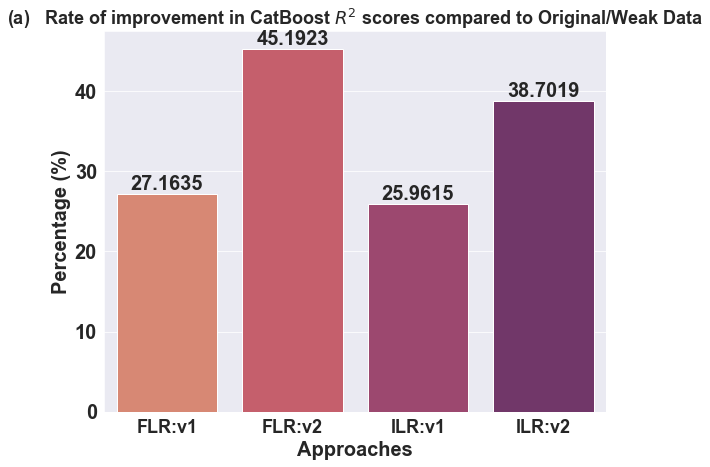

In [16]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=R2.iloc[0,1:].values,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(a)   Rate of improvement in CatBoost $R^{2}$ scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('CB_R2',dpi=100,bbox_inches='tight')

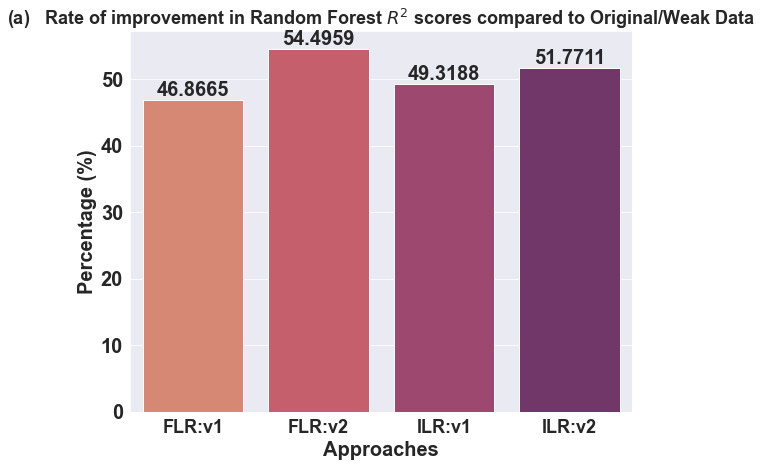

In [17]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=R2.iloc[1,1:].values,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(a)   Rate of improvement in Random Forest $R^{2}$ scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('RF_R2',dpi=100,bbox_inches='tight')

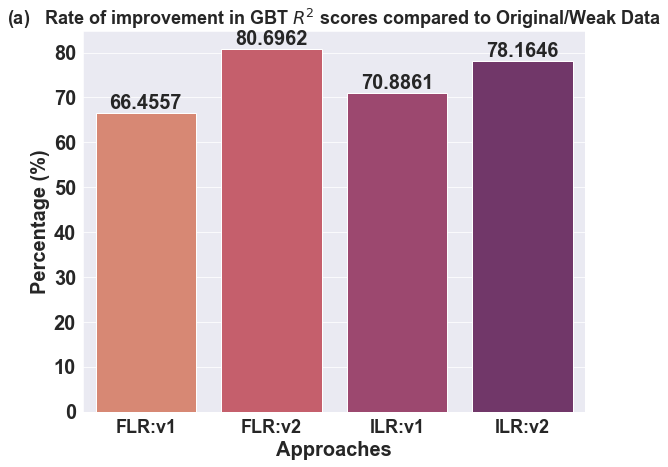

In [18]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=R2.iloc[2,1:].values,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(a)   Rate of improvement in GBT $R^{2}$ scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('GBT_R2',dpi=100,bbox_inches='tight')

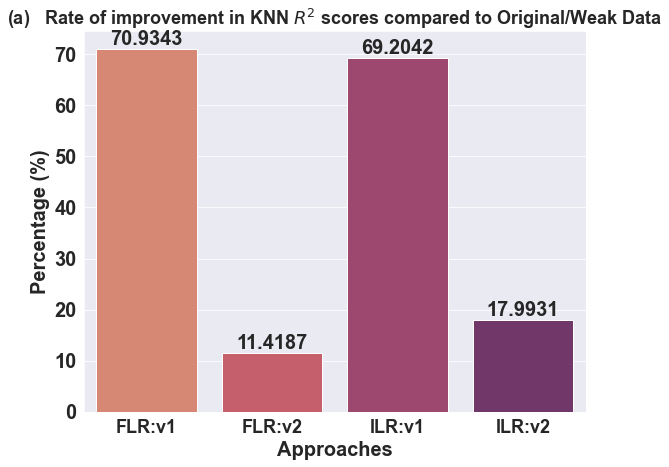

In [19]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=R2.iloc[3,1:].values,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(a)   Rate of improvement in KNN $R^{2}$ scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('KNN_R2',dpi=100,bbox_inches='tight')

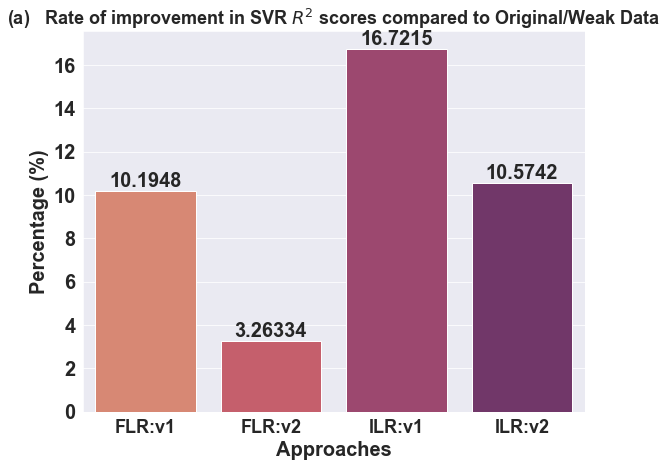

In [20]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=R2.iloc[4,1:].values,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(a)   Rate of improvement in SVR $R^{2}$ scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('SVR_R2',dpi=100,bbox_inches='tight')

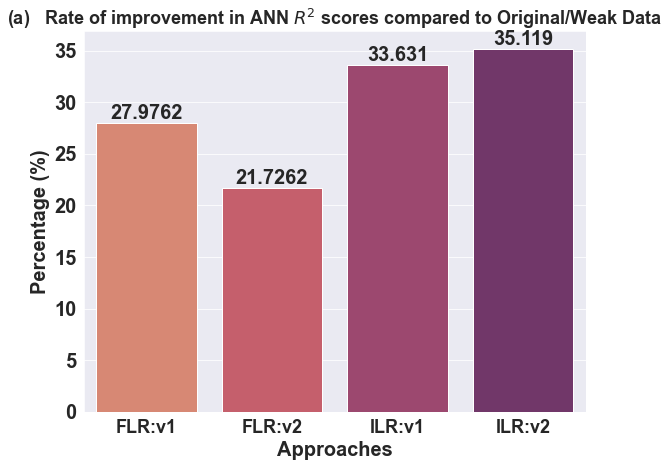

In [21]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=R2.iloc[5,1:].values,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(a)   Rate of improvement in ANN $R^{2}$ scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('ANN_R2',dpi=100,bbox_inches='tight')

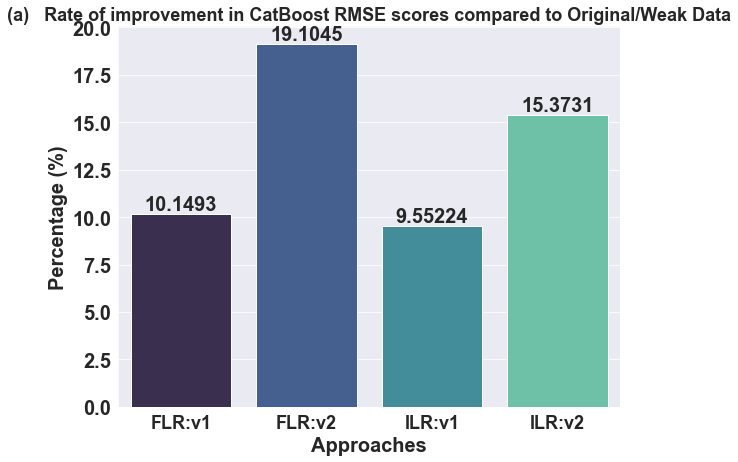

In [22]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=RMSE.iloc[0,1:].values,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(a)   Rate of improvement in CatBoost RMSE scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('CB_RMSE',dpi=100,bbox_inches='tight')

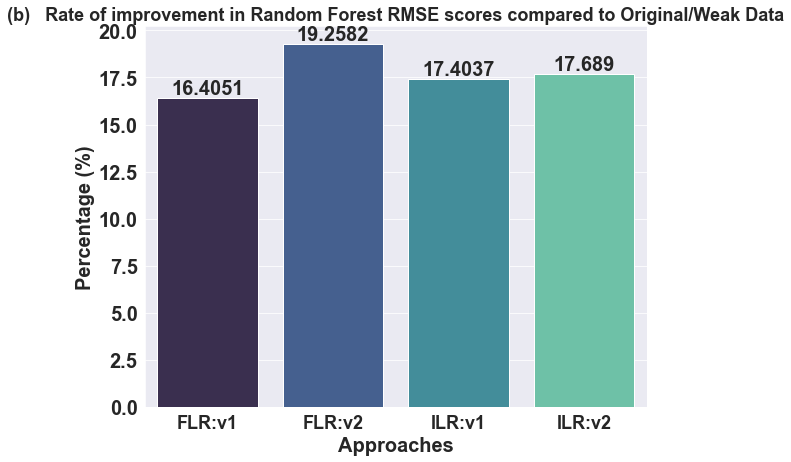

In [23]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=RMSE.iloc[1,1:].values,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(b)   Rate of improvement in Random Forest RMSE scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('RF_RMSE',dpi=100,bbox_inches='tight')

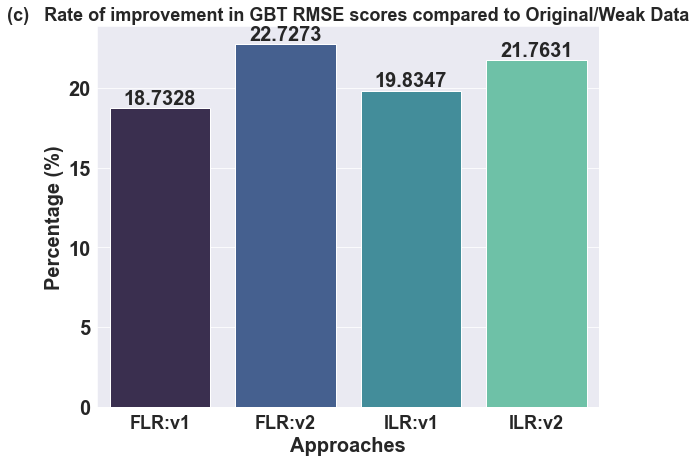

In [24]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=RMSE.iloc[2,1:].values,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(c)   Rate of improvement in GBT RMSE scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('GBT_RMSE',dpi=100,bbox_inches='tight')

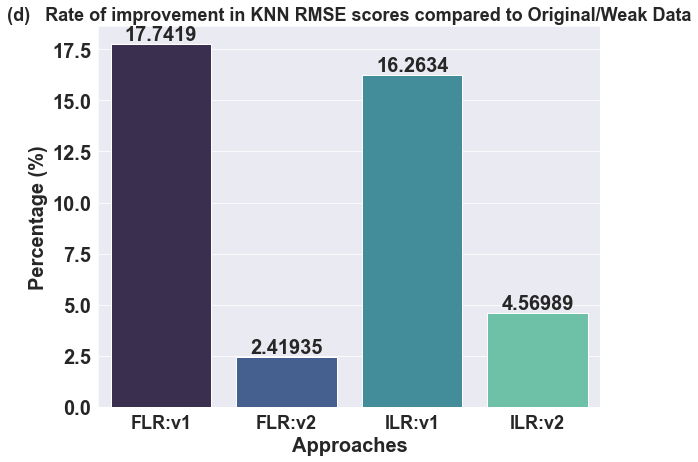

In [25]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=RMSE.iloc[3,1:].values,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(d)   Rate of improvement in KNN RMSE scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('KNN_RMSE',dpi=100,bbox_inches='tight')

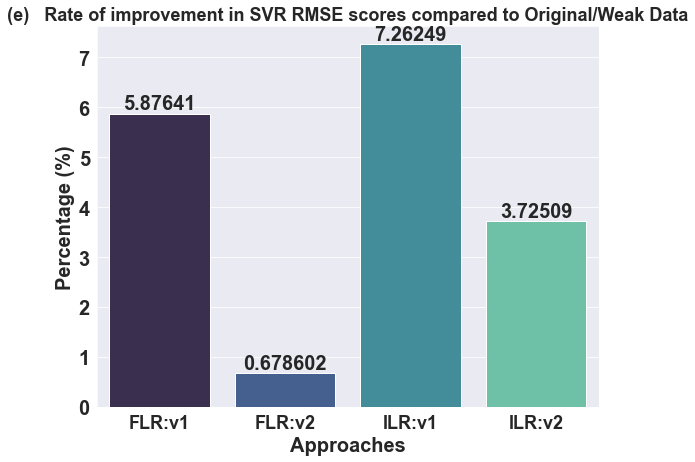

In [26]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=RMSE.iloc[4,1:].values,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(e)   Rate of improvement in SVR RMSE scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('SVR_RMSE',dpi=100,bbox_inches='tight')

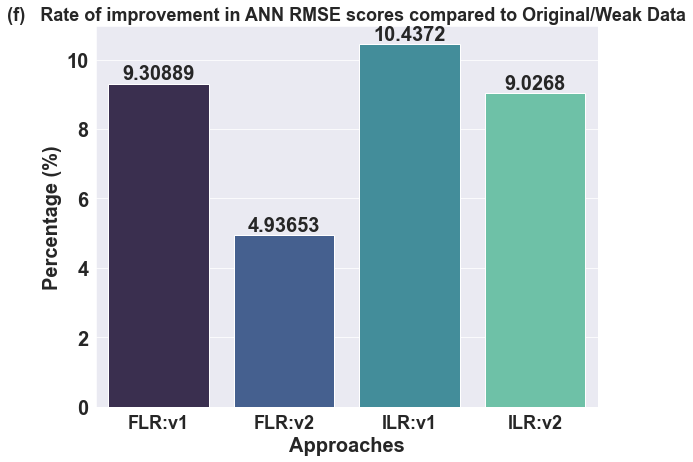

In [27]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Approaches,y=RMSE.iloc[5,1:].values,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Approaches",weight='bold',size=20)
plt.title('(f)   Rate of improvement in ANN RMSE scores compared to Original/Weak Data',weight='bold',size=18)
plt.xticks(size=18,weight='bold',rotation=0)
plt.yticks(size=20,weight='bold')
plt.savefig('ANN_RMSE',dpi=100,bbox_inches='tight')

In [28]:
RMSE = pd.DataFrame(
    {'Appr1_v1': Appr1_v1_rmse_change,
     'Appr1_v2': Appr1_v2_rmse_change,
     'Appr2_v1': Appr2_v1_rmse_change,
     'Appr2_v2': Appr2_v2_rmse_change,})
RMSE.insert(loc=0, column='Algos', value=algos)
RMSE

,Algos,Appr1_v1,Appr1_v2,Appr2_v1,Appr2_v2
0,CatBoost,10.149254,19.104478,9.552239,15.373134
1,Random Forest,16.405136,19.258203,17.403709,17.689016
2,Gradient Boosting Trees,18.732782,22.727273,19.834711,21.763085
3,K-Nearest Neighbors,17.741935,2.419355,16.263441,4.569892
4,Support Vector Regression,5.876408,0.678602,7.262489,3.725094
5,Artificial Neural Network,9.308886,4.936530,10.437236,9.026798


In [29]:
Appr1_v1_change = []
for i in Appr1_v1['Test R2']:
    change = ((Appr1_v1['Test R2'][np.argmax(Appr1_v1['Test R2'])]-i)/i)*100
    Appr1_v1_change.append(change)
Appr1_v1_change =  [round(item,2) for item in Appr1_v1_change]     

Appr1_v2_change = []
for i in Appr1_v2['Test R2']:
    change = ((Appr1_v2['Test R2'][np.argmax(Appr1_v2['Test R2'])]-i)/i)*100
    Appr1_v2_change.append(change)
Appr1_v2_change =  [round(item,2) for item in Appr1_v2_change]     

Appr2_v1_change = []
for i in Appr2_v1['Test R2']:
    change = ((Appr2_v1['Test R2'][np.argmax(Appr2_v1['Test R2'])]-i)/i)*100
    Appr2_v1_change.append(change)
Appr2_v1_change =  [round(item,2) for item in Appr2_v1_change]     

Appr2_v2_change = []
for i in Appr2_v2['Test R2']:
    change = ((Appr2_v2['Test R2'][np.argmax(Appr2_v2['Test R2'])]-i)/i)*100
    Appr2_v2_change.append(change)
Appr2_v2_change =  [round(item,2) for item in Appr2_v2_change] 
    
Weak_change = []
for i in Weak['Test R2']:
    change = ((Weak['Test R2'][np.argmax(Weak['Test R2'])]-i)/i)*100
    Weak_change.append(change)
Weak_change =  [round(item,2) for item in Weak_change] 

In [30]:
print(Appr1_v1_change)
print(Appr1_v2_change)
print(Appr2_v1_change)
print(Appr2_v2_change)
print(Weak_change)

[1.89, 0.0, 2.47, 9.11, 23.74, 25.35]
[0.0, 6.53, 5.78, 87.58, 47.97, 47.68]
[4.58, 0.0, 1.48, 12.07, 18.77, 22.05]
[0.0, 3.59, 2.49, 69.21, 32.01, 27.09]
[0.0, 13.35, 31.65, 43.94, 5.24, 23.81]


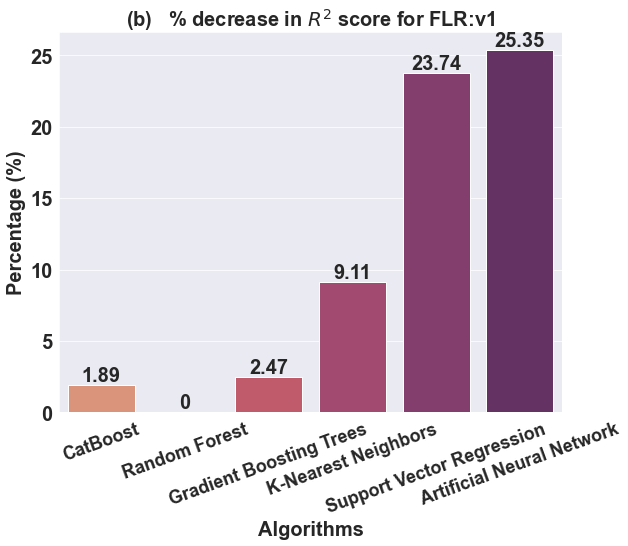

In [31]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr1_v1_change,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(b)   % decrease in $R^{2}$ score for FLR:v1',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr1_v1_change',dpi=100,bbox_inches='tight')

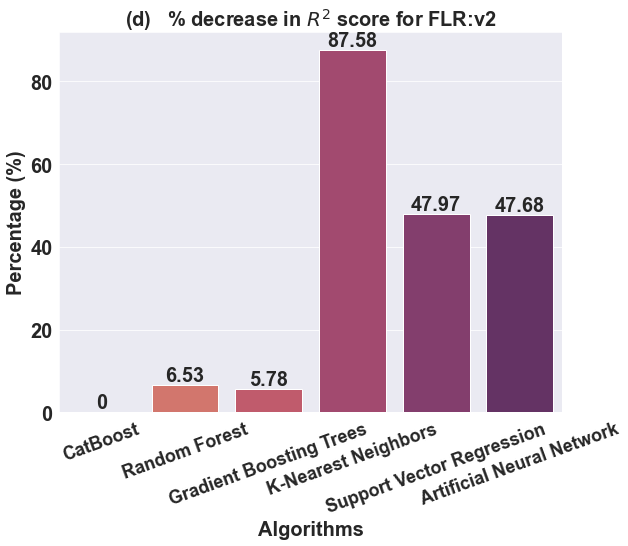

In [32]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr1_v2_change,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(d)   % decrease in $R^{2}$ score for FLR:v2',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr1_v2_change',dpi=100,bbox_inches='tight')

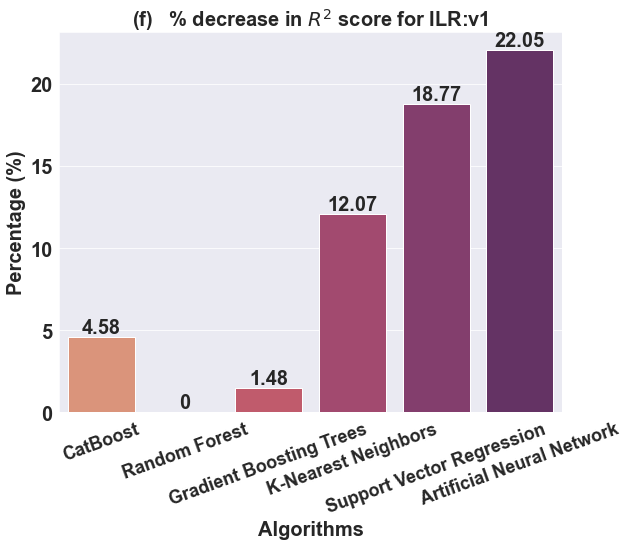

In [33]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr2_v1_change,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(f)   % decrease in $R^{2}$ score for ILR:v1',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr2_v1_change',dpi=100,bbox_inches='tight')

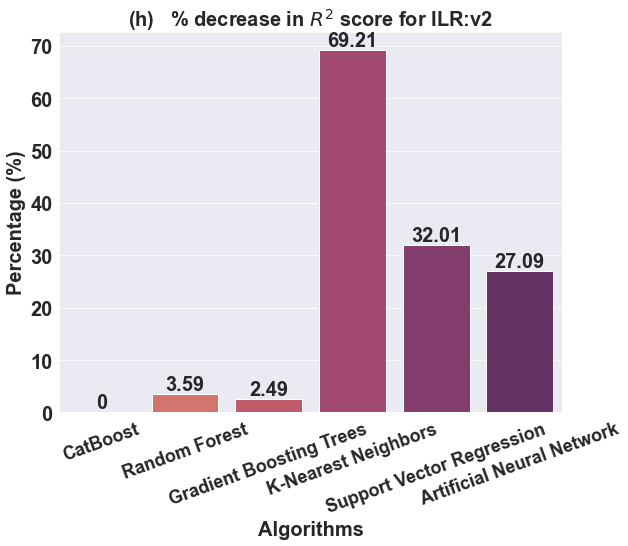

In [34]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr2_v2_change,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(h)   % decrease in $R^{2}$ score for ILR:v2',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr2_v2_change',dpi=100,bbox_inches='tight')

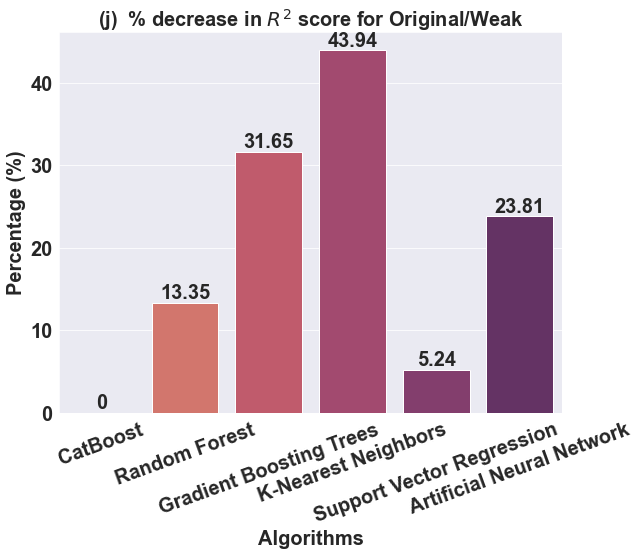

In [35]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Weak_change,palette='flare')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(j)  % decrease in $R^{2}$ score for Original/Weak',weight='bold',size=20)
plt.xticks(size=20,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Weak_change',dpi=100,bbox_inches='tight')

In [36]:
Appr1_v1_rmse_change = []
for i in Appr1_v1['Test RMSE']:
    change = ((i-Appr1_v1['Test RMSE'][np.argmin(Appr1_v1['Test RMSE'])])/i)*100
    Appr1_v1_rmse_change.append(change)
Appr1_v1_rmse_change =  [round(item,2) for item in Appr1_v1_rmse_change]   
    
Appr1_v2_rmse_change = []
for i in Appr1_v2['Test RMSE']:
    change = ((i-Appr1_v2['Test RMSE'][np.argmin(Appr1_v2['Test RMSE'])])/i)*100
    Appr1_v2_rmse_change.append(change)
Appr1_v2_rmse_change =  [round(item,2) for item in Appr1_v2_rmse_change]   
    
Appr2_v1_rmse_change = []
for i in Appr2_v1['Test RMSE']:
    change = ((i-Appr2_v1['Test RMSE'][np.argmin(Appr2_v1['Test RMSE'])])/i)*100
    Appr2_v1_rmse_change.append(change)
Appr2_v1_rmse_change =  [round(item,2) for item in Appr2_v1_rmse_change]   
    
Appr2_v2_rmse_change = []
for i in Appr2_v2['Test RMSE']:
    change = ((i-Appr2_v2['Test RMSE'][np.argmin(Appr2_v2['Test RMSE'])])/i)*100
    Appr2_v2_rmse_change.append(change)
Appr2_v2_rmse_change =  [round(item,2) for item in Appr2_v2_rmse_change]   
    
Weak_rmse_change = []
for i in Weak['Test RMSE']:
    change = ((i-Weak['Test RMSE'][np.argmin(Weak['Test RMSE'])])/i)*100
    Weak_rmse_change.append(change)
Weak_rmse_change =  [round(item,2) for item in Weak_rmse_change]   

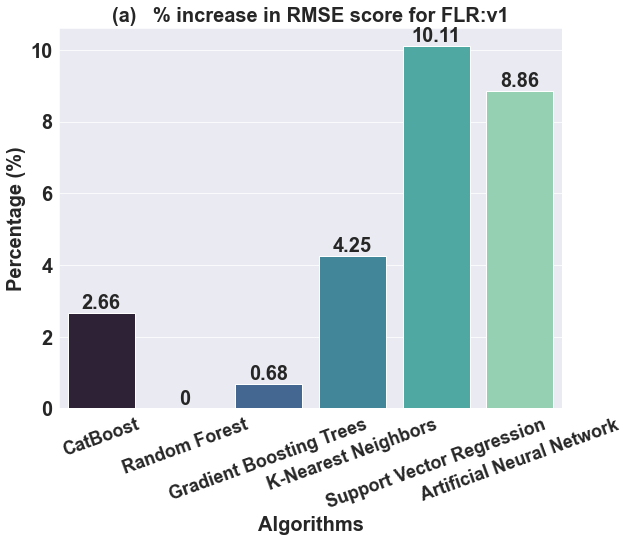

In [37]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr1_v1_rmse_change,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(a)   % increase in RMSE score for FLR:v1',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr1_v1_rmse_change',dpi=100,bbox_inches='tight')

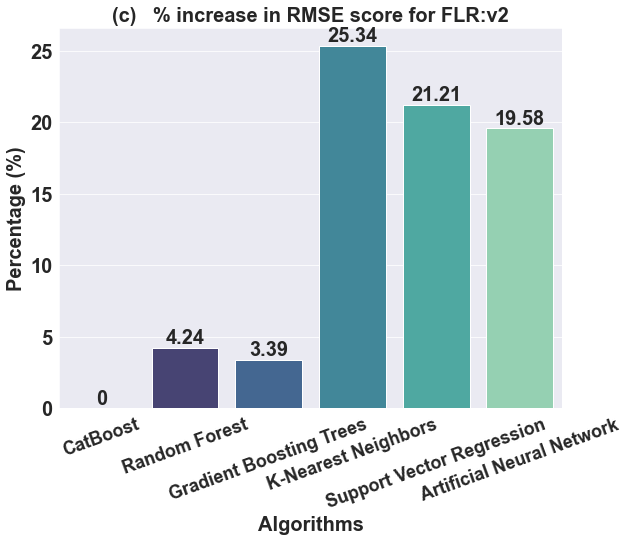

In [38]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr1_v2_rmse_change,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(c)   % increase in RMSE score for FLR:v2',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr1_v2_rmse_change',dpi=100,bbox_inches='tight')

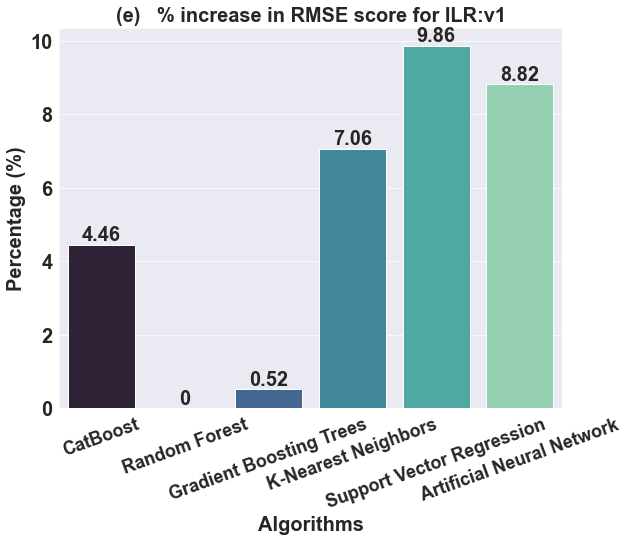

In [39]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr2_v1_rmse_change,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(e)   % increase in RMSE score for ILR:v1',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr2_v1_rmse_change',dpi=100,bbox_inches='tight')

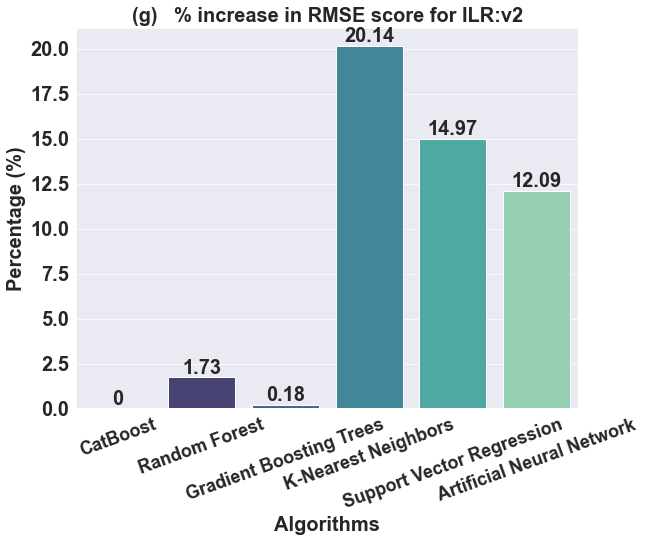

In [40]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Appr2_v2_rmse_change,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(g)   % increase in RMSE score for ILR:v2',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Appr2_v2_rmse_change',dpi=100,bbox_inches='tight')

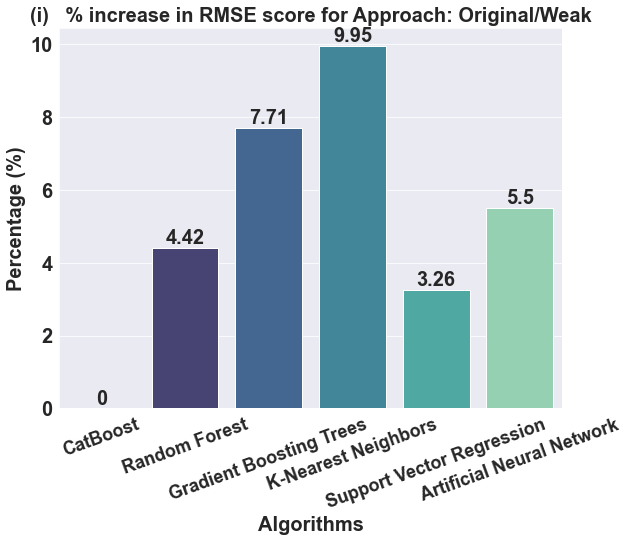

In [41]:
'$R^{2}$'
plt.figure(figsize=(9,7))
ax = sns.barplot(x=Appr1_v1['Algorithms'],y=Weak_rmse_change,palette='mako')
for i in ax.containers:
    ax.bar_label(i,weight='bold',size=20)
plt.ylabel("Percentage (%)",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(i)   % increase in RMSE score for Approach: Original/Weak',weight='bold',size=20)
plt.xticks(size=18,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Weak_rmse_change',dpi=100,bbox_inches='tight')

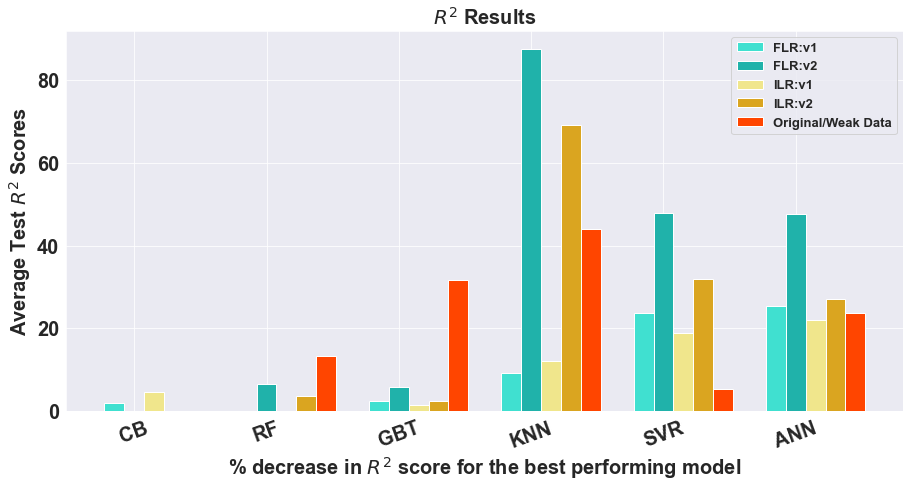

In [42]:
plt.figure(figsize=(15,7))
N = len(Appr1_v1['Test R2'])
ind = np.arange(N) 
width = 0.15
  
xvals = Appr1_v1_change
bar1 = plt.bar(ind, xvals, width, color = 'turquoise')
  
yvals = Appr1_v2_change
bar2 = plt.bar(ind+width, yvals, width, color='lightseagreen')
  
zvals = Appr2_v1_change
bar3 = plt.bar(ind+width*2, zvals, width, color = 'khaki')

gvals = Appr2_v2_change
bar4 = plt.bar(ind+width*3, gvals, width, color = 'goldenrod')

hvals = Weak_change
bar5 = plt.bar(ind+width*4, hvals, width, color = 'orangered')
  
plt.xlabel("% decrease in $R^{2}$ score for the best performing model",size=20,weight='bold')
plt.ylabel('Average Test $R^{2}$ Scores',size=20,weight='bold')
plt.title("$R^{2}$ Results",size=20,weight='bold')

plt.xticks(size=20,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
  
plt.xticks(ind+width,['CB', 'RF', 'GBT','KNN','SVR','ANN'])
plt.legend((bar1, bar2, bar3, bar4, bar5), ('FLR:v1', 'FLR:v2', 'ILR:v1','ILR:v2','Original/Weak Data'),prop={"size":13,'weight':'bold'})
#plt.savefig('R2_All',dpi=100,bbox_inches='tight')
plt.show()

# All Results

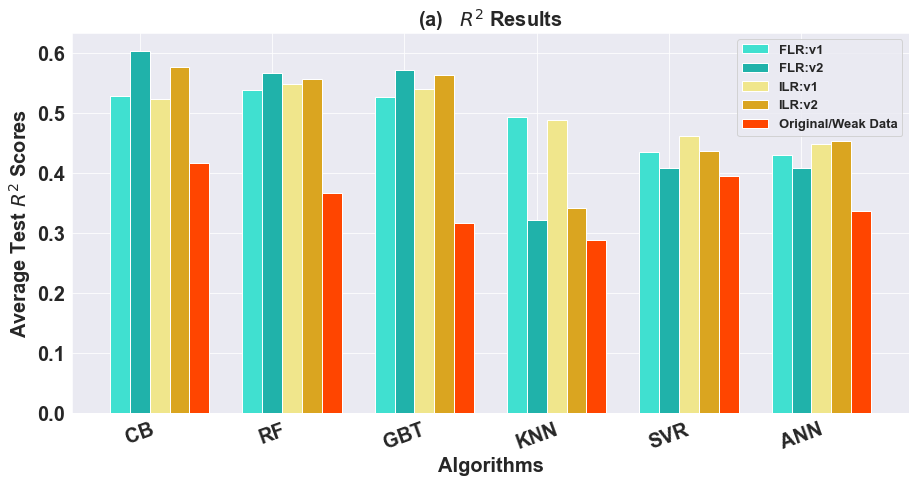

In [43]:
plt.figure(figsize=(15,7))
N = len(Appr1_v1['Test R2'])
ind = np.arange(N) 
width = 0.15
  
xvals = Appr1_v1['Test R2']
bar1 = plt.bar(ind, xvals, width, color = 'turquoise')
  
yvals = Appr1_v2['Test R2']
bar2 = plt.bar(ind+width, yvals, width, color='lightseagreen')
  
zvals = Appr2_v1['Test R2']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'khaki')

gvals = Appr2_v2['Test R2']
bar4 = plt.bar(ind+width*3, gvals, width, color = 'goldenrod')

hvals = Weak['Test R2']
bar5 = plt.bar(ind+width*4, hvals, width, color = 'orangered')
  
plt.xlabel("Algorithms",size=20,weight='bold')
plt.ylabel('Average Test $R^{2}$ Scores',size=20,weight='bold')
plt.title("(a)   $R^{2}$ Results",size=20,weight='bold')

plt.xticks(size=20,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
  
plt.xticks(ind+width,['CB', 'RF', 'GBT','KNN','SVR','ANN'])
plt.legend((bar1, bar2, bar3, bar4, bar5), ('FLR:v1', 'FLR:v2', 'ILR:v1','ILR:v2','Original/Weak Data'),prop={"size":13,'weight':'bold'})
plt.savefig('R2_All',dpi=100,bbox_inches='tight')
plt.show()

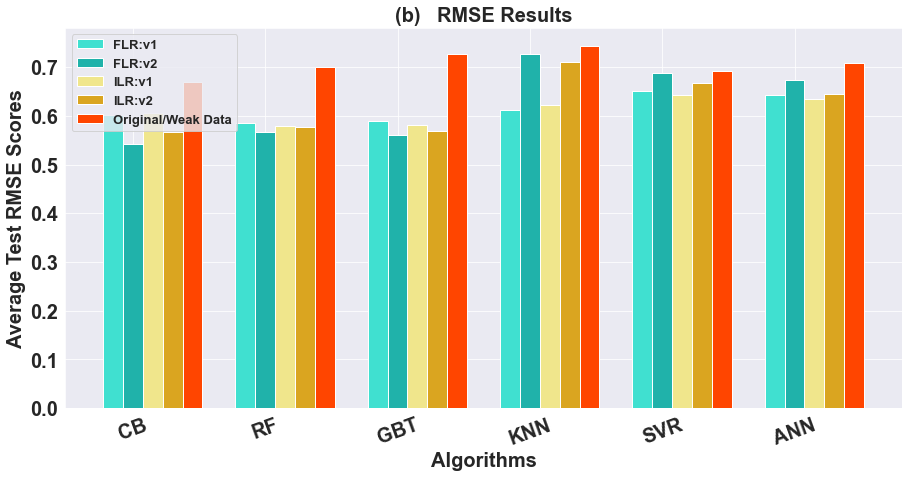

In [44]:
plt.figure(figsize=(15,7))
N = len(Appr1_v1['Test RMSE'])
ind = np.arange(N) 
width = 0.15
  
xvals = Appr1_v1['Test RMSE']
bar1 = plt.bar(ind, xvals, width, color = 'turquoise')
  
yvals = Appr1_v2['Test RMSE']
bar2 = plt.bar(ind+width, yvals, width, color='lightseagreen')
  
zvals = Appr2_v1['Test RMSE']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'khaki')

gvals = Appr2_v2['Test RMSE']
bar4 = plt.bar(ind+width*3, gvals, width, color = 'goldenrod')

hvals = Weak['Test RMSE']
bar5 = plt.bar(ind+width*4, hvals, width, color = 'orangered')
  
plt.xlabel("Algorithms",size=20,weight='bold')
plt.ylabel('Average Test RMSE Scores',size=20,weight='bold')
plt.title("(b)   RMSE Results",size=20,weight='bold')

plt.xticks(size=20,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
  
plt.xticks(ind+width,['CB', 'RF', 'GBT','KNN','SVR','ANN'])
plt.legend((bar1, bar2, bar3, bar4, bar5), ('FLR:v1', 'FLR:v2', 'ILR:v1','ILR:v2','Original/Weak Data'),prop={"size":13,'weight':'bold'})
plt.savefig('RMSE_All',dpi=100,bbox_inches='tight')
plt.show()

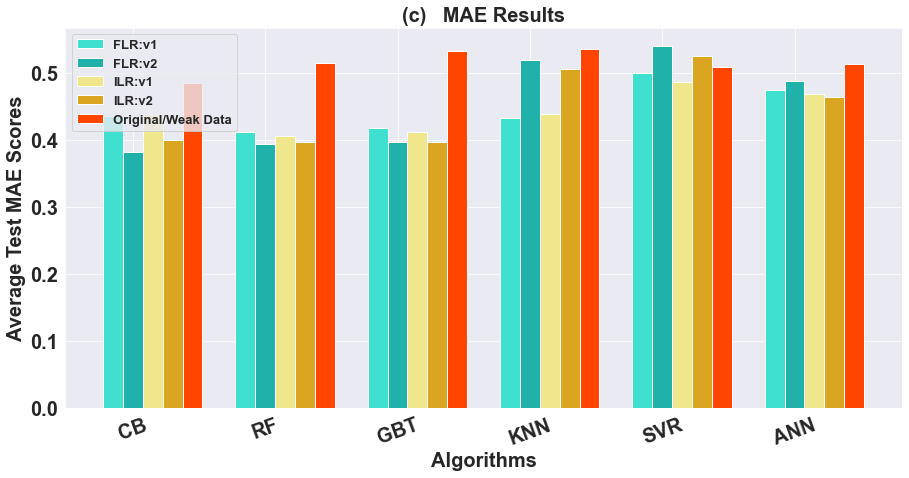

In [45]:
plt.figure(figsize=(15,7))
N = len(Appr1_v1['Test MAE'])
ind = np.arange(N) 
width = 0.15
  
xvals = Appr1_v1['Test MAE']
bar1 = plt.bar(ind, xvals, width, color = 'turquoise')
  
yvals = Appr1_v2['Test MAE']
bar2 = plt.bar(ind+width, yvals, width, color='lightseagreen')
  
zvals = Appr2_v1['Test MAE']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'khaki')

gvals = Appr2_v2['Test MAE']
bar4 = plt.bar(ind+width*3, gvals, width, color = 'goldenrod')

hvals = Weak['Test MAE']
bar5 = plt.bar(ind+width*4, hvals, width, color = 'orangered')
  
plt.xlabel("Algorithms",size=20,weight='bold')
plt.ylabel('Average Test MAE Scores',size=20,weight='bold')
plt.title("(c)   MAE Results",size=20,weight='bold')

plt.xticks(size=20,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
  
plt.xticks(ind+width,['CB', 'RF', 'GBT','KNN','SVR','ANN'])
plt.legend((bar1, bar2, bar3, bar4, bar5), ('FLR:v1', 'FLR:v2', 'ILR:v1','ILR:v2','Original/Weak Data'),prop={"size":13,'weight':'bold'})
plt.savefig('MAE_All',dpi=100,bbox_inches='tight')
plt.show()

# All Std 

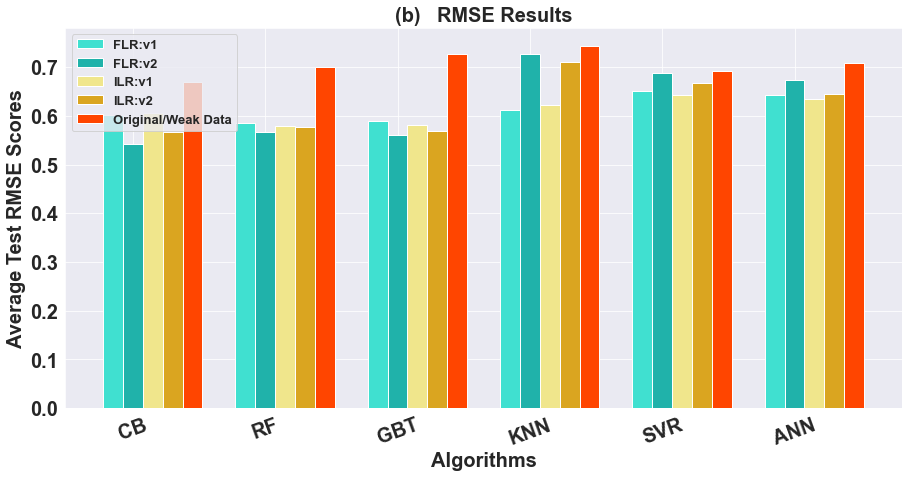

In [46]:
plt.figure(figsize=(15,7))
N = len(Appr1_v1['Test RMSE'])
ind = np.arange(N) 
width = 0.15
  
xvals = Appr1_v1['Test RMSE']
bar1 = plt.bar(ind, xvals, width, color = 'turquoise')
  
yvals = Appr1_v2['Test RMSE']
bar2 = plt.bar(ind+width, yvals, width, color='lightseagreen')
  
zvals = Appr2_v1['Test RMSE']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'khaki')

gvals = Appr2_v2['Test RMSE']
bar4 = plt.bar(ind+width*3, gvals, width, color = 'goldenrod')

hvals = Weak['Test RMSE']
bar5 = plt.bar(ind+width*4, hvals, width, color = 'orangered')
  
plt.xlabel("Algorithms",size=20,weight='bold')
plt.ylabel('Average Test RMSE Scores',size=20,weight='bold')
plt.title("(b)   RMSE Results",size=20,weight='bold')

plt.xticks(size=20,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
  
plt.xticks(ind+width,['CB', 'RF', 'GBT','KNN','SVR','ANN'])
plt.legend((bar1, bar2, bar3, bar4, bar5), ('FLR:v1', 'FLR:v2', 'ILR:v1','ILR:v2','Original/Weak Data'),prop={"size":13,'weight':'bold'})
plt.savefig('RMSE_All',dpi=100,bbox_inches='tight')
plt.show()

In [47]:
Appr1_v1_all = pd.read_excel(r'Appr1_v1 All Data.xlsx')
Appr1_v2_all = pd.read_excel(r'Appr1_v2 All Data.xlsx')
Appr2_v1_all = pd.read_excel(r'Appr2_v1 All Data.xlsx')
Appr2_v2_all = pd.read_excel(r'Appr2_v2 All Data.xlsx')
Weak_all = pd.read_excel(r'Weak Data All Data.xlsx')

In [48]:
Appr1_v1_all = Appr1_v1_all.iloc[:,:13]
Appr1_v2_all = Appr1_v2_all.iloc[:,:13]
Appr2_v1_all = Appr2_v1_all.iloc[:,:13]
Appr2_v2_all = Appr2_v2_all.iloc[:,:13]
Weak_all = Weak_all.iloc[:,:13]

In [49]:
Appr1_v1_all

,Algos,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2,Test MAE,Test RMSE,Test R2
0,CB,0.014,0.088,0.988,0.354,0.585,0.480,0.365,0.580,0.526
1,CB,0.016,0.072,0.995,0.491,0.701,0.525,0.474,0.677,0.542
2,CB,0.000,0.000,1.000,0.620,0.754,0.613,0.623,0.780,0.646
3,CB,0.014,0.078,0.987,0.380,0.569,0.368,0.369,0.541,0.394
4,CB,0.008,0.046,0.997,0.359,0.506,0.607,0.357,0.513,0.602
5,CB,0.024,0.122,0.981,0.462,0.683,0.379,0.458,0.679,0.389
6,CB,0.008,0.046,0.997,0.346,0.495,0.596,0.349,0.500,0.616
7,CB,0.002,0.017,1.000,0.547,0.689,0.377,0.496,0.620,0.488
8,CB,0.009,0.047,0.997,0.358,0.515,0.608,0.350,0.498,0.621
9,CB,0.002,0.017,1.000,0.571,0.728,0.389,0.504,0.628,0.464


# Appr1_v1 Plotting

In [50]:
sns.set_style("darkgrid")

In [51]:
from statistics import stdev
from statistics import variance as var

# CB Standard Deviations

In [52]:
Appr1_v1_std_R2_CB = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'CB']['Test R2'])
Appr1_v1_std_RMSE_CB = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'CB']['Test RMSE'])

Appr1_v2_std_R2_CB = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'CB']['Test R2'])
Appr1_v2_std_RMSE_CB = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'CB']['Test RMSE'])

Appr2_v1_std_R2_CB = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'CB']['Test R2'])
Appr2_v1_std_RMSE_CB = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'CB']['Test RMSE'])

Appr2_v2_std_R2_CB = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'CB']['Test R2'])
Appr2_v2_std_RMSE_CB = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'CB']['Test RMSE'])

Weak_std_R2_CB = stdev(Weak_all[Weak_all['Algos'] == 'CB']['Test R2'])
Weak_std_RMSE_CB = stdev(Weak_all[Weak_all['Algos'] == 'CB']['Test RMSE'])

In [53]:
Appr1_v1_std_R2_RF = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'RF']['Test R2'])
Appr1_v1_std_RMSE_RF = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'RF']['Test RMSE'])

Appr1_v2_std_R2_RF = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'RF']['Test R2'])
Appr1_v2_std_RMSE_RF = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'RF']['Test RMSE'])

Appr2_v1_std_R2_RF = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'RF']['Test R2'])
Appr2_v1_std_RMSE_RF = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'RF']['Test RMSE'])

Appr2_v2_std_R2_RF = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'RF']['Test R2'])
Appr2_v2_std_RMSE_RF = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'RF']['Test RMSE'])

Weak_std_R2_RF = stdev(Weak_all[Weak_all['Algos'] == 'RF']['Test R2'])
Weak_std_RMSE_RF = stdev(Weak_all[Weak_all['Algos'] == 'RF']['Test RMSE'])

In [54]:
Appr1_v1_std_R2_GBT = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'GBT']['Test R2'])
Appr1_v1_std_RMSE_GBT = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'GBT']['Test RMSE'])

Appr1_v2_std_R2_GBT = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'GBT']['Test R2'])
Appr1_v2_std_RMSE_GBT = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'GBT']['Test RMSE'])

Appr2_v1_std_R2_GBT = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'GBT']['Test R2'])
Appr2_v1_std_RMSE_GBT = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'GBT']['Test RMSE'])

Appr2_v2_std_R2_GBT = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'GBT']['Test R2'])
Appr2_v2_std_RMSE_GBT = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'GBT']['Test RMSE'])

Weak_std_R2_GBT = stdev(Weak_all[Weak_all['Algos'] == 'GBT']['Test R2'])
Weak_std_RMSE_GBT = stdev(Weak_all[Weak_all['Algos'] == 'GBT']['Test RMSE'])

In [55]:
Appr1_v1_std_R2_KNN = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'KNN']['Test R2'])
Appr1_v1_std_RMSE_KNN = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'KNN']['Test RMSE'])

Appr1_v2_std_R2_KNN = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'KNN']['Test R2'])
Appr1_v2_std_RMSE_KNN = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'KNN']['Test RMSE'])

Appr2_v1_std_R2_KNN = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'KNN']['Test R2'])
Appr2_v1_std_RMSE_KNN = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'KNN']['Test RMSE'])

Appr2_v2_std_R2_KNN = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'KNN']['Test R2'])
Appr2_v2_std_RMSE_KNN = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'KNN']['Test RMSE'])

Weak_std_R2_KNN = stdev(Weak_all[Weak_all['Algos'] == 'KNN']['Test R2'])
Weak_std_RMSE_KNN = stdev(Weak_all[Weak_all['Algos'] == 'KNN']['Test RMSE'])

In [56]:
Appr1_v1_std_R2_SVR = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'SVR']['Test R2'])
Appr1_v1_std_RMSE_SVR = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'SVR']['Test RMSE'])

Appr1_v2_std_R2_SVR = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'SVR']['Test R2'])
Appr1_v2_std_RMSE_SVR = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'SVR']['Test RMSE'])

Appr2_v1_std_R2_SVR = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'SVR']['Test R2'])
Appr2_v1_std_RMSE_SVR = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'SVR']['Test RMSE'])

Appr2_v2_std_R2_SVR = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'SVR']['Test R2'])
Appr2_v2_std_RMSE_SVR = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'SVR']['Test RMSE'])

Weak_std_R2_SVR = stdev(Weak_all[Weak_all['Algos'] == 'SVR']['Test R2'])
Weak_std_RMSE_SVR = stdev(Weak_all[Weak_all['Algos'] == 'SVR']['Test RMSE'])

In [57]:
Appr1_v1_std_R2_ANN = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'ANN']['Test R2'])
Appr1_v1_std_RMSE_ANN = stdev(Appr1_v1_all[Appr1_v1_all['Algos'] == 'ANN']['Test RMSE'])

Appr1_v2_std_R2_ANN = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'ANN']['Test R2'])
Appr1_v2_std_RMSE_ANN = stdev(Appr1_v2_all[Appr1_v2_all['Algos'] == 'ANN']['Test RMSE'])

Appr2_v1_std_R2_ANN = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'ANN']['Test R2'])
Appr2_v1_std_RMSE_ANN = stdev(Appr2_v1_all[Appr2_v1_all['Algos'] == 'ANN']['Test RMSE'])

Appr2_v2_std_R2_ANN = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'ANN']['Test R2'])
Appr2_v2_std_RMSE_ANN = stdev(Appr2_v2_all[Appr2_v2_all['Algos'] == 'ANN']['Test RMSE'])

Weak_std_R2_ANN = stdev(Weak_all[Weak_all['Algos'] == 'ANN']['Test R2'])
Weak_std_RMSE_ANN = stdev(Weak_all[Weak_all['Algos'] == 'ANN']['Test RMSE'])

In [58]:
CB_R2_std = [Appr1_v1_std_R2_CB,Appr1_v2_std_R2_CB,Appr2_v1_std_R2_CB,Appr2_v2_std_R2_CB,Weak_std_R2_CB]
CB_RMSE_std = [Appr1_v1_std_RMSE_CB,Appr1_v2_std_RMSE_CB,Appr2_v1_std_RMSE_CB,Appr2_v2_std_RMSE_CB,Weak_std_RMSE_CB]

In [59]:
RF_R2_std = [Appr1_v1_std_R2_RF,Appr1_v2_std_R2_RF,Appr2_v1_std_R2_RF,Appr2_v2_std_R2_RF,Weak_std_R2_RF]
RF_RMSE_std = [Appr1_v1_std_RMSE_RF,Appr1_v2_std_RMSE_RF,Appr2_v1_std_RMSE_RF,Appr2_v2_std_RMSE_RF,Weak_std_RMSE_RF]

In [60]:
GBT_R2_std = [Appr1_v1_std_R2_GBT,Appr1_v2_std_R2_GBT,Appr2_v1_std_R2_GBT,Appr2_v2_std_R2_GBT,Weak_std_R2_GBT]
GBT_RMSE_std = [Appr1_v1_std_RMSE_GBT,Appr1_v2_std_RMSE_GBT,Appr2_v1_std_RMSE_GBT,Appr2_v2_std_RMSE_GBT,Weak_std_RMSE_GBT]

In [61]:
KNN_R2_std = [Appr1_v1_std_R2_KNN,Appr1_v2_std_R2_KNN,Appr2_v1_std_R2_KNN,Appr2_v2_std_R2_KNN,Weak_std_R2_KNN]
KNN_RMSE_std = [Appr1_v1_std_RMSE_KNN,Appr1_v2_std_RMSE_KNN,Appr2_v1_std_RMSE_KNN,Appr2_v2_std_RMSE_KNN,Weak_std_RMSE_KNN]

In [62]:
SVR_R2_std = [Appr1_v1_std_R2_SVR,Appr1_v2_std_R2_SVR,Appr2_v1_std_R2_SVR,Appr2_v2_std_R2_SVR,Weak_std_R2_SVR]
SVR_RMSE_std = [Appr1_v1_std_RMSE_SVR,Appr1_v2_std_RMSE_SVR,Appr2_v1_std_RMSE_SVR,Appr2_v2_std_RMSE_SVR,Weak_std_RMSE_SVR]

In [63]:
ANN_R2_std = [Appr1_v1_std_R2_ANN,Appr1_v2_std_R2_ANN,Appr2_v1_std_R2_ANN,Appr2_v2_std_R2_ANN,Weak_std_R2_ANN]
ANN_RMSE_std = [Appr1_v1_std_RMSE_ANN,Appr1_v2_std_RMSE_ANN,Appr2_v1_std_RMSE_ANN,Appr2_v2_std_RMSE_ANN,Weak_std_RMSE_ANN]

In [64]:
Std_RF_DF = pd.DataFrame([CB_R2_std,RF_R2_std,GBT_R2_std,KNN_R2_std,SVR_R2_std,ANN_R2_std],columns=['Appr1_v1','Appr1_v2','Appr2_v1','Appr2_v2','Weak'])

In [65]:
Std_RMSE_DF = pd.DataFrame([CB_RMSE_std,RF_RMSE_std,GBT_RMSE_std,KNN_RMSE_std,SVR_RMSE_std,ANN_RMSE_std],columns=['Appr1_v1','Appr1_v2','Appr2_v1','Appr2_v2','Weak'])

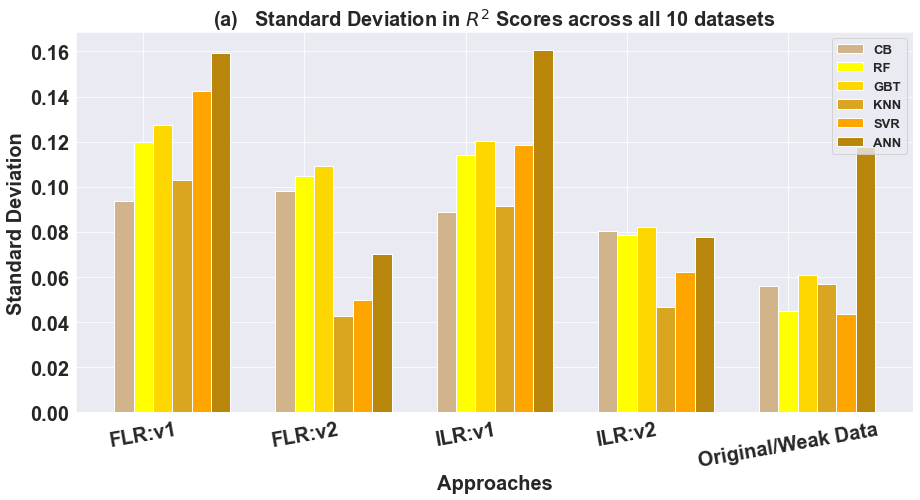

In [66]:
plt.figure(figsize=(15,7))
N = len(Std_RF_DF.iloc[0,:].values)
ind = np.arange(N) 
width = 0.12
  
xvals = Std_RF_DF.iloc[0,:].values
bar1 = plt.bar(ind, xvals, width, color = 'tan')
  
yvals = Std_RF_DF.iloc[1,:].values
bar2 = plt.bar(ind+width, yvals, width, color='yellow')
  
zvals = Std_RF_DF.iloc[2,:].values
bar3 = plt.bar(ind+width*2, zvals, width, color = 'gold')

gvals = Std_RF_DF.iloc[3,:].values
bar4 = plt.bar(ind+width*3, gvals, width, color = 'goldenrod')

hvals = Std_RF_DF.iloc[4,:].values
bar5 = plt.bar(ind+width*4, hvals, width, color = 'orange')

ivals = Std_RF_DF.iloc[5,:].values
bar6 = plt.bar(ind+width*5, ivals, width, color = 'darkgoldenrod')
  
plt.xlabel("Approaches",size=20,weight='bold')
plt.ylabel('Standard Deviation',size=20,weight='bold')
plt.title("(a)   Standard Deviation in $R^{2}$ Scores across all 10 datasets",size=20,weight='bold')

plt.xticks(size=20,weight='bold',rotation=10)
plt.yticks(size=20,weight='bold')
  
plt.xticks(ind+width,['FLR:v1', 'FLR:v2', 'ILR:v1','ILR:v2','Original/Weak Data'])
plt.legend((bar1, bar2, bar3, bar4, bar5, bar6), ('CB', 'RF', 'GBT','KNN','SVR','ANN'),prop={"size":13,'weight':'bold'})
plt.savefig('Std_R2_All',dpi=100,bbox_inches='tight')
plt.show()

# Std_All_RMSE

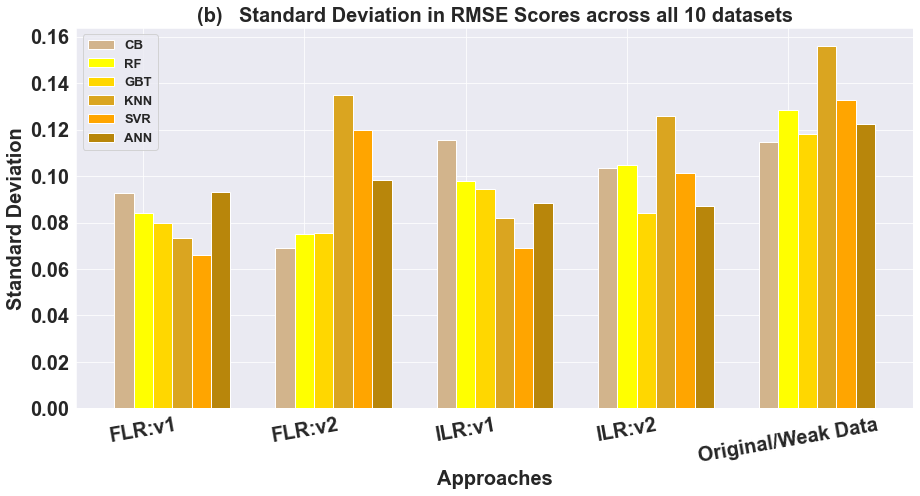

In [67]:
plt.figure(figsize=(15,7))
N = len(Std_RMSE_DF.iloc[0,:].values)
ind = np.arange(N) 
width = 0.12
  
xvals = Std_RMSE_DF.iloc[0,:].values
bar1 = plt.bar(ind, xvals, width, color = 'tan')
  
yvals = Std_RMSE_DF.iloc[1,:].values
bar2 = plt.bar(ind+width, yvals, width, color='yellow')
  
zvals = Std_RMSE_DF.iloc[2,:].values
bar3 = plt.bar(ind+width*2, zvals, width, color = 'gold')

gvals = Std_RMSE_DF.iloc[3,:].values
bar4 = plt.bar(ind+width*3, gvals, width, color = 'goldenrod')

hvals = Std_RMSE_DF.iloc[4,:].values
bar5 = plt.bar(ind+width*4, hvals, width, color = 'orange')

ivals = Std_RMSE_DF.iloc[5,:].values
bar6 = plt.bar(ind+width*5, ivals, width, color = 'darkgoldenrod')
  
plt.xlabel("Approaches",size=20,weight='bold')
plt.ylabel('Standard Deviation',size=20,weight='bold')
plt.title("(b)   Standard Deviation in RMSE Scores across all 10 datasets",size=20,weight='bold')

plt.xticks(size=20,weight='bold',rotation=10)
plt.yticks(size=20,weight='bold')
  
plt.xticks(ind+width,['FLR:v1', 'FLR:v2', 'ILR:v1','ILR:v2','Original/Weak Data'])
plt.legend((bar1, bar2, bar3, bar4, bar5, bar6), ('CB', 'RF', 'GBT','KNN','SVR','ANN'),prop={"size":13,'weight':'bold'})
plt.savefig('Std_RMSE_All',dpi=100,bbox_inches='tight')
plt.show()

# Boxplots

C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


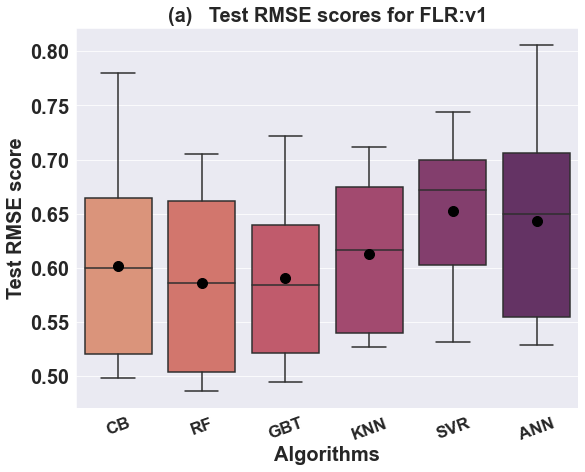

In [68]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr1_v1_all['Algos'],Appr1_v1_all['Test RMSE'],palette="flare",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test RMSE score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(a)   Test RMSE scores for FLR:v1',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test RMSE Boxplot',dpi=100,bbox_inches='tight')

C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


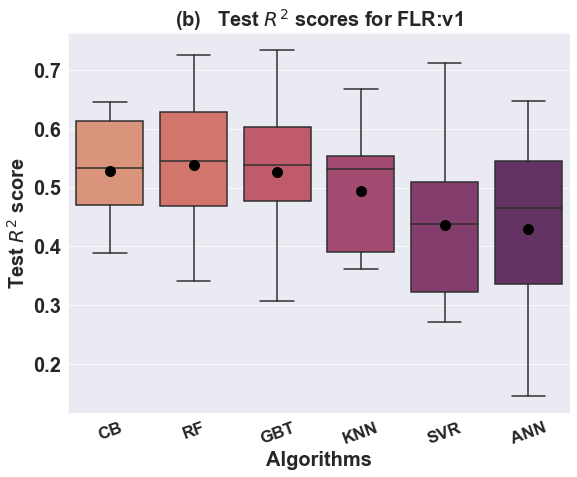

In [69]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr1_v1_all['Algos'],Appr1_v1_all['Test R2'],palette="flare",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test $R^{2}$ score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(b)   Test $R^{2}$ scores for FLR:v1',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test R2 Boxplot',dpi=100,bbox_inches='tight')

# Appr1_v2

In [70]:
Appr1_v2_all.head()

,Algos,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2,Test MAE,Test RMSE,Test R2
0,CB,0.023,0.092,0.987,0.345,0.552,0.562,0.350,0.552,0.571
1,CB,0.024,0.075,0.995,0.443,0.635,0.587,0.441,0.628,0.610
2,CB,0.000,0.000,1.000,0.461,0.631,0.732,0.447,0.597,0.795
3,CB,0.020,0.076,0.988,0.336,0.498,0.518,0.321,0.482,0.524
4,CB,0.012,0.048,0.996,0.307,0.451,0.675,0.317,0.462,0.668


C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


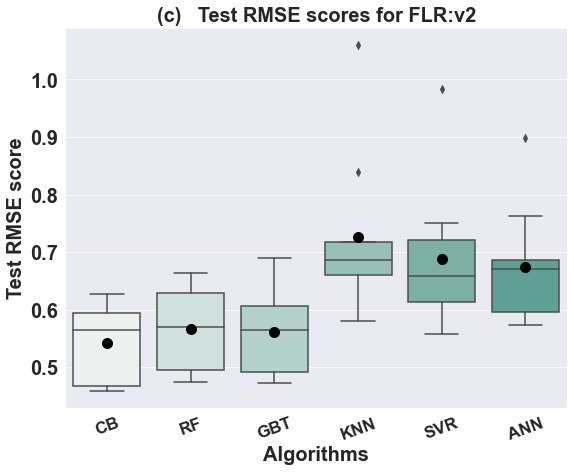

In [71]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr1_v2_all['Algos'],Appr1_v2_all['Test RMSE'],palette="light:#5A9",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test RMSE score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(c)   Test RMSE scores for FLR:v2',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test RMSE2 Boxplot',dpi=100,bbox_inches='tight')

C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


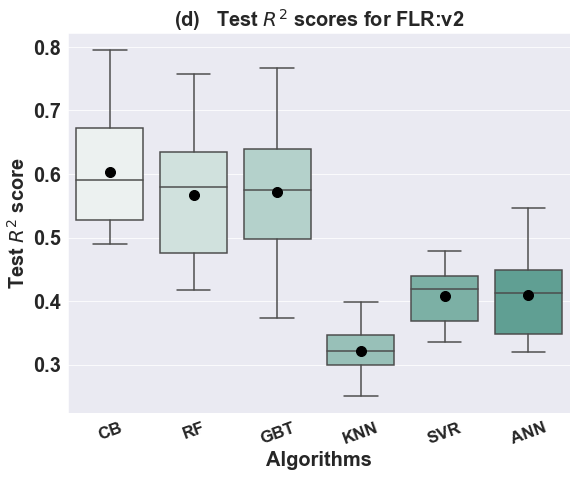

In [72]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr1_v2_all['Algos'],Appr1_v2_all['Test R2'],palette="light:#5A9",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test $R^{2}$ score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(d)   Test $R^{2}$ scores for FLR:v2',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test R2_2 Boxplot',dpi=100,bbox_inches='tight')

# Appr2_v1

In [73]:
Appr2_v1_all.head()

,Algos,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2,Test MAE,Test RMSE,Test R2
0,CB,0.014,0.088,0.988,0.381,0.605,0.488,0.380,0.585,0.518
1,CB,0.014,0.069,0.995,0.458,0.660,0.583,0.472,0.671,0.556
2,CB,0.000,0.000,1.000,0.685,0.829,0.550,0.683,0.852,0.564
3,CB,0.011,0.077,0.987,0.354,0.516,0.445,0.350,0.514,0.459
4,CB,0.008,0.045,0.997,0.361,0.526,0.601,0.337,0.497,0.612


C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


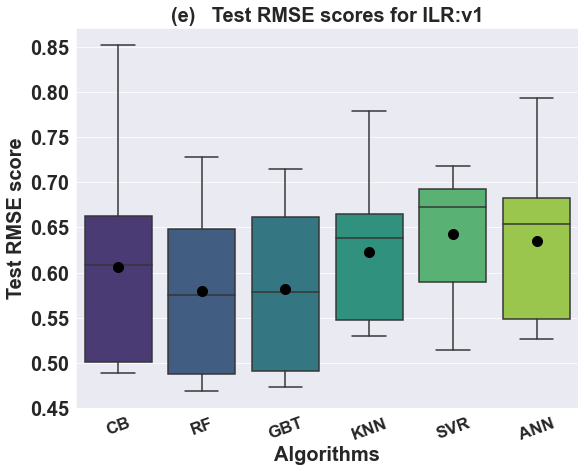

In [74]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr2_v1_all['Algos'],Appr2_v1_all['Test RMSE'],palette="viridis",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test RMSE score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(e)   Test RMSE scores for ILR:v1',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test RMSE3 Boxplot',dpi=100,bbox_inches='tight')

C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


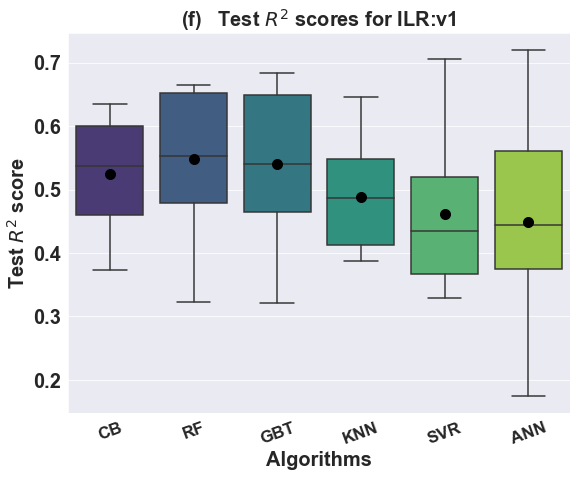

In [75]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr2_v1_all['Algos'],Appr2_v1_all['Test R2'],palette="viridis",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test $R^{2}$ score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(f)   Test $R^{2}$ scores for ILR:v1',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test R2_3 Boxplot',dpi=100,bbox_inches='tight')

# Appr2_v2

In [76]:
Appr2_v2_all.head()

,Algos,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2,Test MAE,Test RMSE,Test R2
0,CB,0.023,0.105,0.984,0.352,0.534,0.586,0.358,0.552,0.569
1,CB,0.017,0.069,0.995,0.449,0.660,0.601,0.448,0.640,0.600
2,CB,0.000,0.000,1.000,0.552,0.749,0.658,0.597,0.794,0.636
3,CB,0.013,0.080,0.987,0.335,0.495,0.472,0.334,0.499,0.481
4,CB,0.008,0.043,0.997,0.327,0.492,0.651,0.308,0.461,0.674


C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


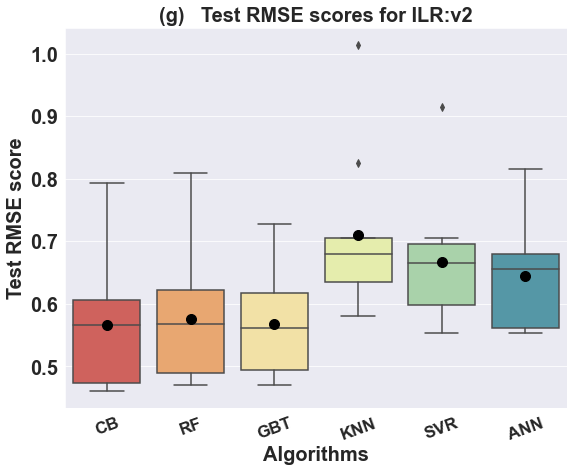

In [77]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr2_v2_all['Algos'],Appr2_v2_all['Test RMSE'],palette="Spectral",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test RMSE score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(g)   Test RMSE scores for ILR:v2',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test RMSE4 Boxplot',dpi=100,bbox_inches='tight')

C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


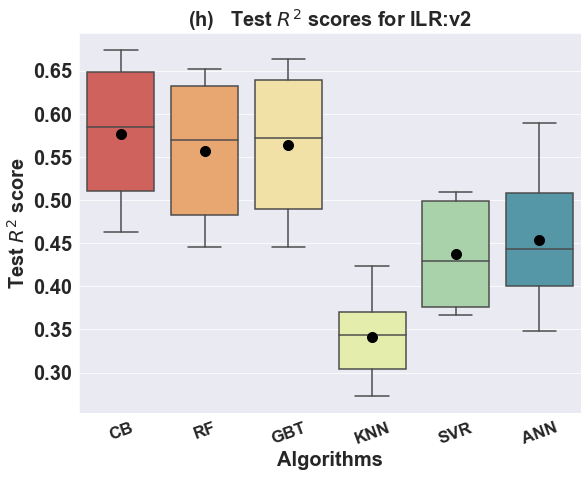

In [78]:
plt.figure(figsize=(9,7))
sns.boxplot(Appr2_v2_all['Algos'],Appr2_v2_all['Test R2'],palette="Spectral",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test $R^{2}$ score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(h)   Test $R^{2}$ scores for ILR:v2',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test R2_4 Boxplot',dpi=100,bbox_inches='tight')

# Weak Data

In [79]:
Weak_all = pd.read_excel(r'Weak Data All Data.xlsx')
Weak_all

,Algos,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2,Test MAE,Test RMSE,Test R2
0,CB,0.116,0.176,0.957,0.489,0.685,0.331,0.495,0.696,0.317
1,CB,0.121,0.159,0.976,0.572,0.765,0.443,0.586,0.780,0.401
2,CB,0.001,0.001,1.000,0.741,0.903,0.502,0.734,0.941,0.467
3,CB,0.087,0.128,0.967,0.388,0.565,0.329,0.390,0.555,0.359
4,CB,0.068,0.097,0.986,0.400,0.591,0.428,0.406,0.602,0.438
5,CB,0.129,0.195,0.950,0.434,0.641,0.462,0.415,0.608,0.501
6,CB,0.071,0.100,0.985,0.411,0.606,0.466,0.404,0.600,0.446
7,CB,0.018,0.035,0.998,0.466,0.623,0.406,0.499,0.653,0.399
8,CB,0.068,0.098,0.986,0.393,0.579,0.429,0.400,0.596,0.457
9,CB,0.018,0.032,0.999,0.483,0.630,0.447,0.506,0.672,0.372


C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


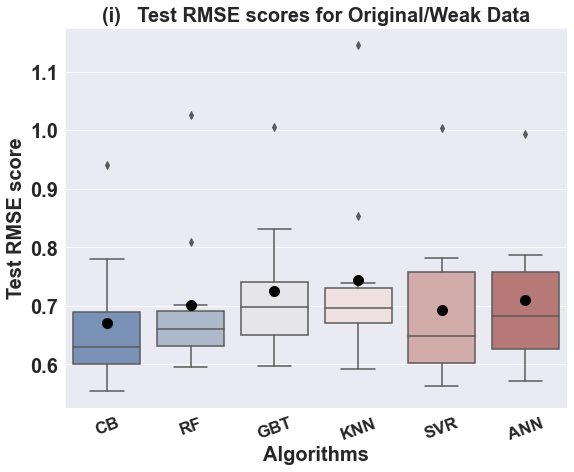

In [80]:
plt.figure(figsize=(9,7))
sns.boxplot(Weak_all['Algos'],Weak_all['Test RMSE'],palette="vlag",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test RMSE score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(i)   Test RMSE scores for Original/Weak Data',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test RMSE5 Boxplot New',dpi=100,bbox_inches='tight')

C:\Users\Saad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


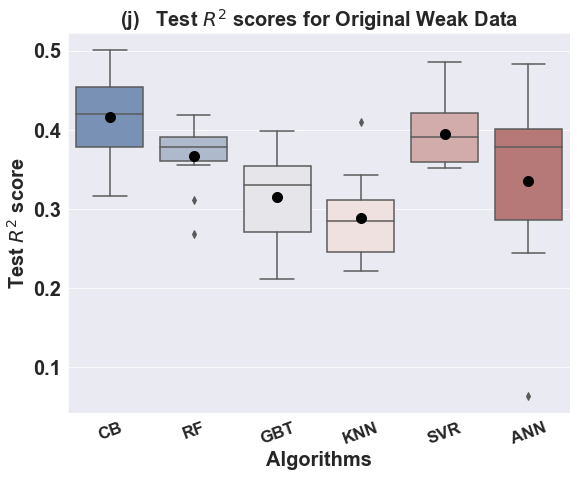

In [81]:
plt.figure(figsize=(9,7))
sns.boxplot(Weak_all['Algos'],Weak_all['Test R2'],palette="vlag",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Test $R^{2}$ score",weight='bold',size=20)
plt.xlabel("Algorithms",weight='bold',size=20)
plt.title('(j)   Test $R^{2}$ scores for Original Weak Data',weight='bold',size=20)
plt.xticks(size=17,weight='bold',rotation=20)
plt.yticks(size=20,weight='bold')
plt.savefig('Test R2_5 Boxplot New',dpi=100,bbox_inches='tight')

In [8]:
Data1 = pd.read_excel('Appr1_v1.xlsx')
Data2 = pd.read_excel('Appr1_v2.xlsx')
Data3 = pd.read_excel('Appr2_v1.xlsx')
Data4 = pd.read_excel('Appr2_v2.xlsx')
Data5 = pd.read_excel('Weak Data.xlsx')

In [9]:
Data1

,Algorithms,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2,Test MAE,Test RMSE,Test R2
0,CatBoost,0.0100,0.0530,0.9940,0.4490,0.6220,0.4940,0.4350,0.6020,0.5290
1,Random Forest,0.2180,0.3200,0.8660,0.4310,0.6170,0.4930,0.4120,0.5860,0.5390
2,Gradient Boosting Trees,0.1800,0.2480,0.8930,0.4430,0.6300,0.4730,0.4180,0.5900,0.5260
3,K-Nearest Neighbors,0.3600,0.5200,0.6580,0.4300,0.6080,0.4870,0.4320,0.6120,0.4940
4,Support Vector Regression,0.3538,0.4102,0.7838,0.5005,0.6527,0.4478,0.4991,0.6519,0.4356
5,Artificial Neural Network,0.3920,0.5340,0.5900,0.4690,0.6460,0.4250,0.4740,0.6430,0.4300


In [13]:
import plotly.graph_objects as go


Appr1_v1 = Data1['Test R2']
Appr1_v2 = Data2['Test R2']
Appr2_v1 = Data3['Test R2']
Appr2_v2 = Data4['Test R2']
Weak = Data5['Test R2']


categories = ['CB', 'RF', 'GBT', 'KNN', 'SVR','ANN']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=Appr1_v1,
      theta=categories,
      fill=None,
      name='Final Layer Representation Version 1'
))
fig.add_trace(go.Scatterpolar(
      r=Appr1_v2, 
      theta=categories,
      fill=None,
      name='Final Layer Representation Version 2'
))
fig.add_trace(go.Scatterpolar(
      r=Appr2_v1,
      theta=categories,
      fill=None,
      name='Intermediate Layer Representation Version 1'
))
fig.add_trace(go.Scatterpolar(
      r=Appr2_v2,
      theta=categories,
      fill=None,
      name='Intermediate Layer Representation Version 2'
))

fig.add_trace(go.Scatterpolar(
      r=Weak,
      theta=categories,
      fill=None,
      name='Origial/Weak Data'
))

fig.update_layout(
    legend=dict(x=0.7,y=1),
    title=dict(text='(b)   Test R2 Scores',x=0.5,y=0.9),
    polar=dict(radialaxis=dict(visible=True,range=[0.3, 0.62])),
    showlegend=True
)

fig.show()

In [15]:
import plotly.graph_objects as go


Appr1_v1 = Data1['Test RMSE']
Appr1_v2 = Data2['Test RMSE']
Appr2_v1 = Data3['Test RMSE']
Appr2_v2 = Data4['Test RMSE']
Weak = Data5['Test RMSE']


categories = ['CB', 'RF', 'GBT', 'KNN', 'SVR','ANN']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=Appr1_v1,
      theta=categories,
      fill=None,
      name='Final Layer Representation Version 1'
))
fig.add_trace(go.Scatterpolar(
      r=Appr1_v2, 
      theta=categories,
      fill=None,
      name='Final Layer Representation Version 2'
))
fig.add_trace(go.Scatterpolar(
      r=Appr2_v1,
      theta=categories,
      fill=None,
      name='Intermediate Layer Representation Version 1'
))
fig.add_trace(go.Scatterpolar(
      r=Appr2_v2,
      theta=categories,
      fill=None,
      name='Intermediate Layer Representation Version 2'
))

fig.add_trace(go.Scatterpolar(
      r=Weak,
      theta=categories,
      fill=None,
      name='Origial/Weak Data'
))

fig.update_layout(
    legend=dict(x=0.7,y=1),
    title=dict(text='(a)   Test RMSE Scores',x=0.5,y=0.9),
    polar=dict(radialaxis=dict(visible=True,range=[0.3, 0.8])),
    showlegend=True
)
#fig.write_image('myplot.png', scale=3)
fig.show()


In [14]:
import plotly.graph_objects as go


Appr1_v1 = Data1['Test MAE']
Appr1_v2 = Data2['Test MAE']
Appr2_v1 = Data3['Test MAE']
Appr2_v2 = Data4['Test MAE']
Weak = Data5['Test MAE']


categories = ['CB', 'RF', 'GBT', 'KNN', 'SVR','ANN']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=Appr1_v1,
      theta=categories,
      fill=None,
      name='Final Layer Representation Version 1'
))
fig.add_trace(go.Scatterpolar(
      r=Appr1_v2, 
      theta=categories,
      fill=None,
      name='Final Layer Representation Version 2'
))
fig.add_trace(go.Scatterpolar(
      r=Appr2_v1,
      theta=categories,
      fill=None,
      name='Intermediate Layer Representation Version 1'
))
fig.add_trace(go.Scatterpolar(
      r=Appr2_v2,
      theta=categories,
      fill=None,
      name='Intermediate Layer Representation Version 2'
))

fig.add_trace(go.Scatterpolar(
      r=Weak,
      theta=categories,
      fill=None,
      name='Origial/Weak Data'
))

fig.update_layout(
    legend=dict(x=0.7,y=1),
    title=dict(text='(c)   Test MAE Scores',x=0.5,y=0.9),
    polar=dict(radialaxis=dict(visible=True,range=[0.3, 0.62])),
    showlegend=True
)

fig.show()

Let $\boldsymbol{x}$ be the input data, $\boldsymbol{y}$ be the output of the neural network, and $\boldsymbol{z}$ be the values extracted from an intermediate layer. Then, the neural network can be represented as a function $f(\boldsymbol{x};\boldsymbol{\theta})$, where $\boldsymbol{\theta}$ represents the parameters of the network.

To extract the values from the $i$-th intermediate layer of the network, you can use the notation $\boldsymbol{z}^{(i)} = f^{(i)}(\boldsymbol{x};\boldsymbol{\theta})$, where $f^{(i)}$ represents the function corresponding to the $i$-th layer of the network.

In other words, you would apply the network function $f$ to the input data $\boldsymbol{x}$ and then extract the values from the $i$-th layer using the function $f^{(i)}$. This notation makes it clear that the extracted values are a function of the input data and the parameters of the network.

# FLR

To write the extraction of values from the output layer of a neural network as an equation in your article, you can use the following notation:

Let $\boldsymbol{x}$ be the input data, $\boldsymbol{y}$ be the output of the neural network, and $\boldsymbol{z}$ be the values extracted from the output layer. Then, the neural network can be represented as a function $f(\boldsymbol{x};\boldsymbol{\theta})$, where $\boldsymbol{\theta}$ represents the parameters of the network.

To extract the values from the output layer of the network, you can use the notation $\boldsymbol{z} = f_{out}(\boldsymbol{x};\boldsymbol{\theta})$, where $f_{out}$ represents the function corresponding to the output layer of the network.

In other words, you would apply the network function $f$ to the input data $\boldsymbol{x}$ and then extract the output values from the output layer using the function $f_{out}$. This notation makes it clear that the extracted values are a function of the input data and the parameters of the network.

It's important to note that the output layer of a neural network can have different forms depending on the specific task that the network is designed for. For example, in a classification task, the output layer might consist of a softmax activation function to produce class probabilities, while in a regression task, the output layer might consist of a linear activation function to produce continuous values. Therefore, the function $f_{out}$ would depend on the specific architecture of the network and the task being solved.